# Imports

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as mn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (11, 7)

# Data and EDA

In [41]:
df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.isnull().sum()  # See that 77% percent of data missing from cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dealing with **Missing Data** 

In [42]:
df = df.drop(columns=['Cabin']) #Drop cabin since there are a lot of missing data in this column 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


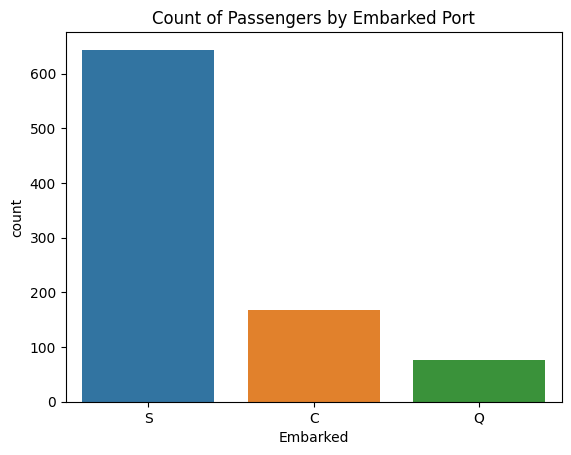

In [21]:
sns.countplot(x='Embarked', data=df)
plt.title('Count of Passengers by Embarked Port')
plt.show()

Filling missing values in the 'Embarked' column with the mode (most frequent value) of that column.

In [44]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<Axes: >

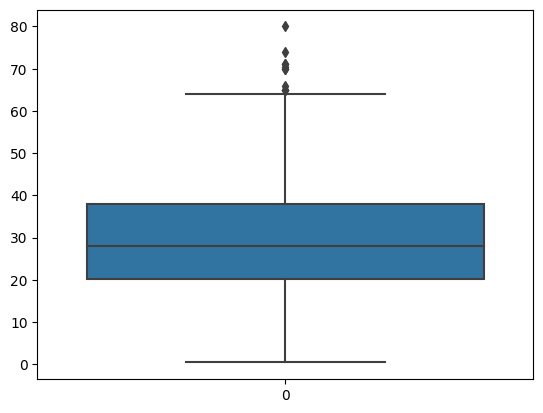

In [6]:
sns.boxplot(df['Age'])

In [46]:
# Function for getting mean and median values as a new column for our dataset 
def mean_median(df, variable):
    mean_value = df[variable].mean()
    median_value = df[variable].median()

    df[f'{variable}_mean'] = df[variable].fillna(mean_value)
    df[f'{variable}_median'] = df[variable].fillna(median_value)

mean_median(df, 'Age')

In [47]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean,Age_median
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,27.000000,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,19.000000,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S,29.699118,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,26.000000,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,32.000000,32.0


In [48]:
# Function for replaces the missing values in this new column with randomly sampled values from the non-null values of the original column, and keeps the original values for non-missing entries.
def age_fill(df,variable):
    df[variable+'_random'] = df[variable]
    random_values = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_values.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_values

age_fill(df, 'Age')


In [49]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean,Age_median,Age_random
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,27.000000,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,19.000000,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S,29.699118,28.0,15.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,26.000000,26.0,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,32.000000,32.0,32.0


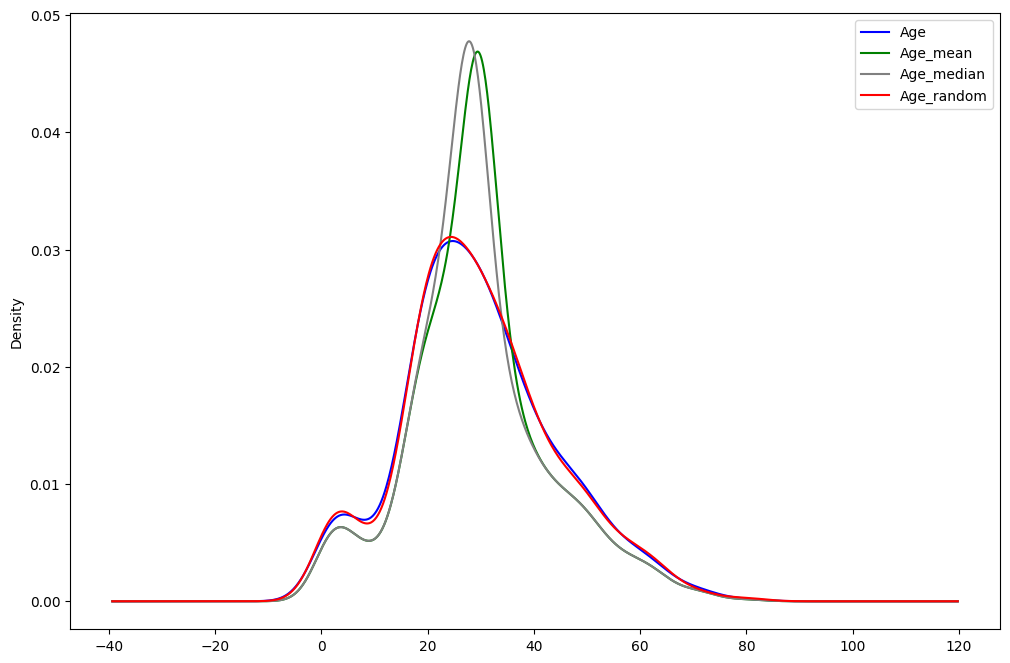

In [50]:
# Let's compare our imputing for Age
plt.figure(figsize=(12,8))
df.Age.plot(kind='kde',color='b')
df.Age_mean.plot(kind='kde',color='g')
df.Age_median.plot(kind='kde',color='grey')
df.Age_random.plot(kind='kde',color='r')
plt.legend()

In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_mean,Age_median,Age_random
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118,29.361582,29.700348
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015,13.019697,14.563654
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.420000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,22.000000,21.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,28.000000,28.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,35.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,80.000000,80.000000


In [36]:
# From results above seems like we can drop Age_mean, Age_median and use Age_random as new Age column

In [52]:
df = df.drop(columns=['Age_mean', 'Age_median']) #Drop columns

In [54]:
df['Age'] = df['Age_random']

In [56]:
df = df.drop(columns=['Age_random'], axis=1)

In [57]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,15.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [58]:
df.info() # We dont have any missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [63]:
df['Sex'] = df['Sex'].replace({'male':0 , 'female':1}) #replace male female with 0 - 1

Check for relationship with data each other

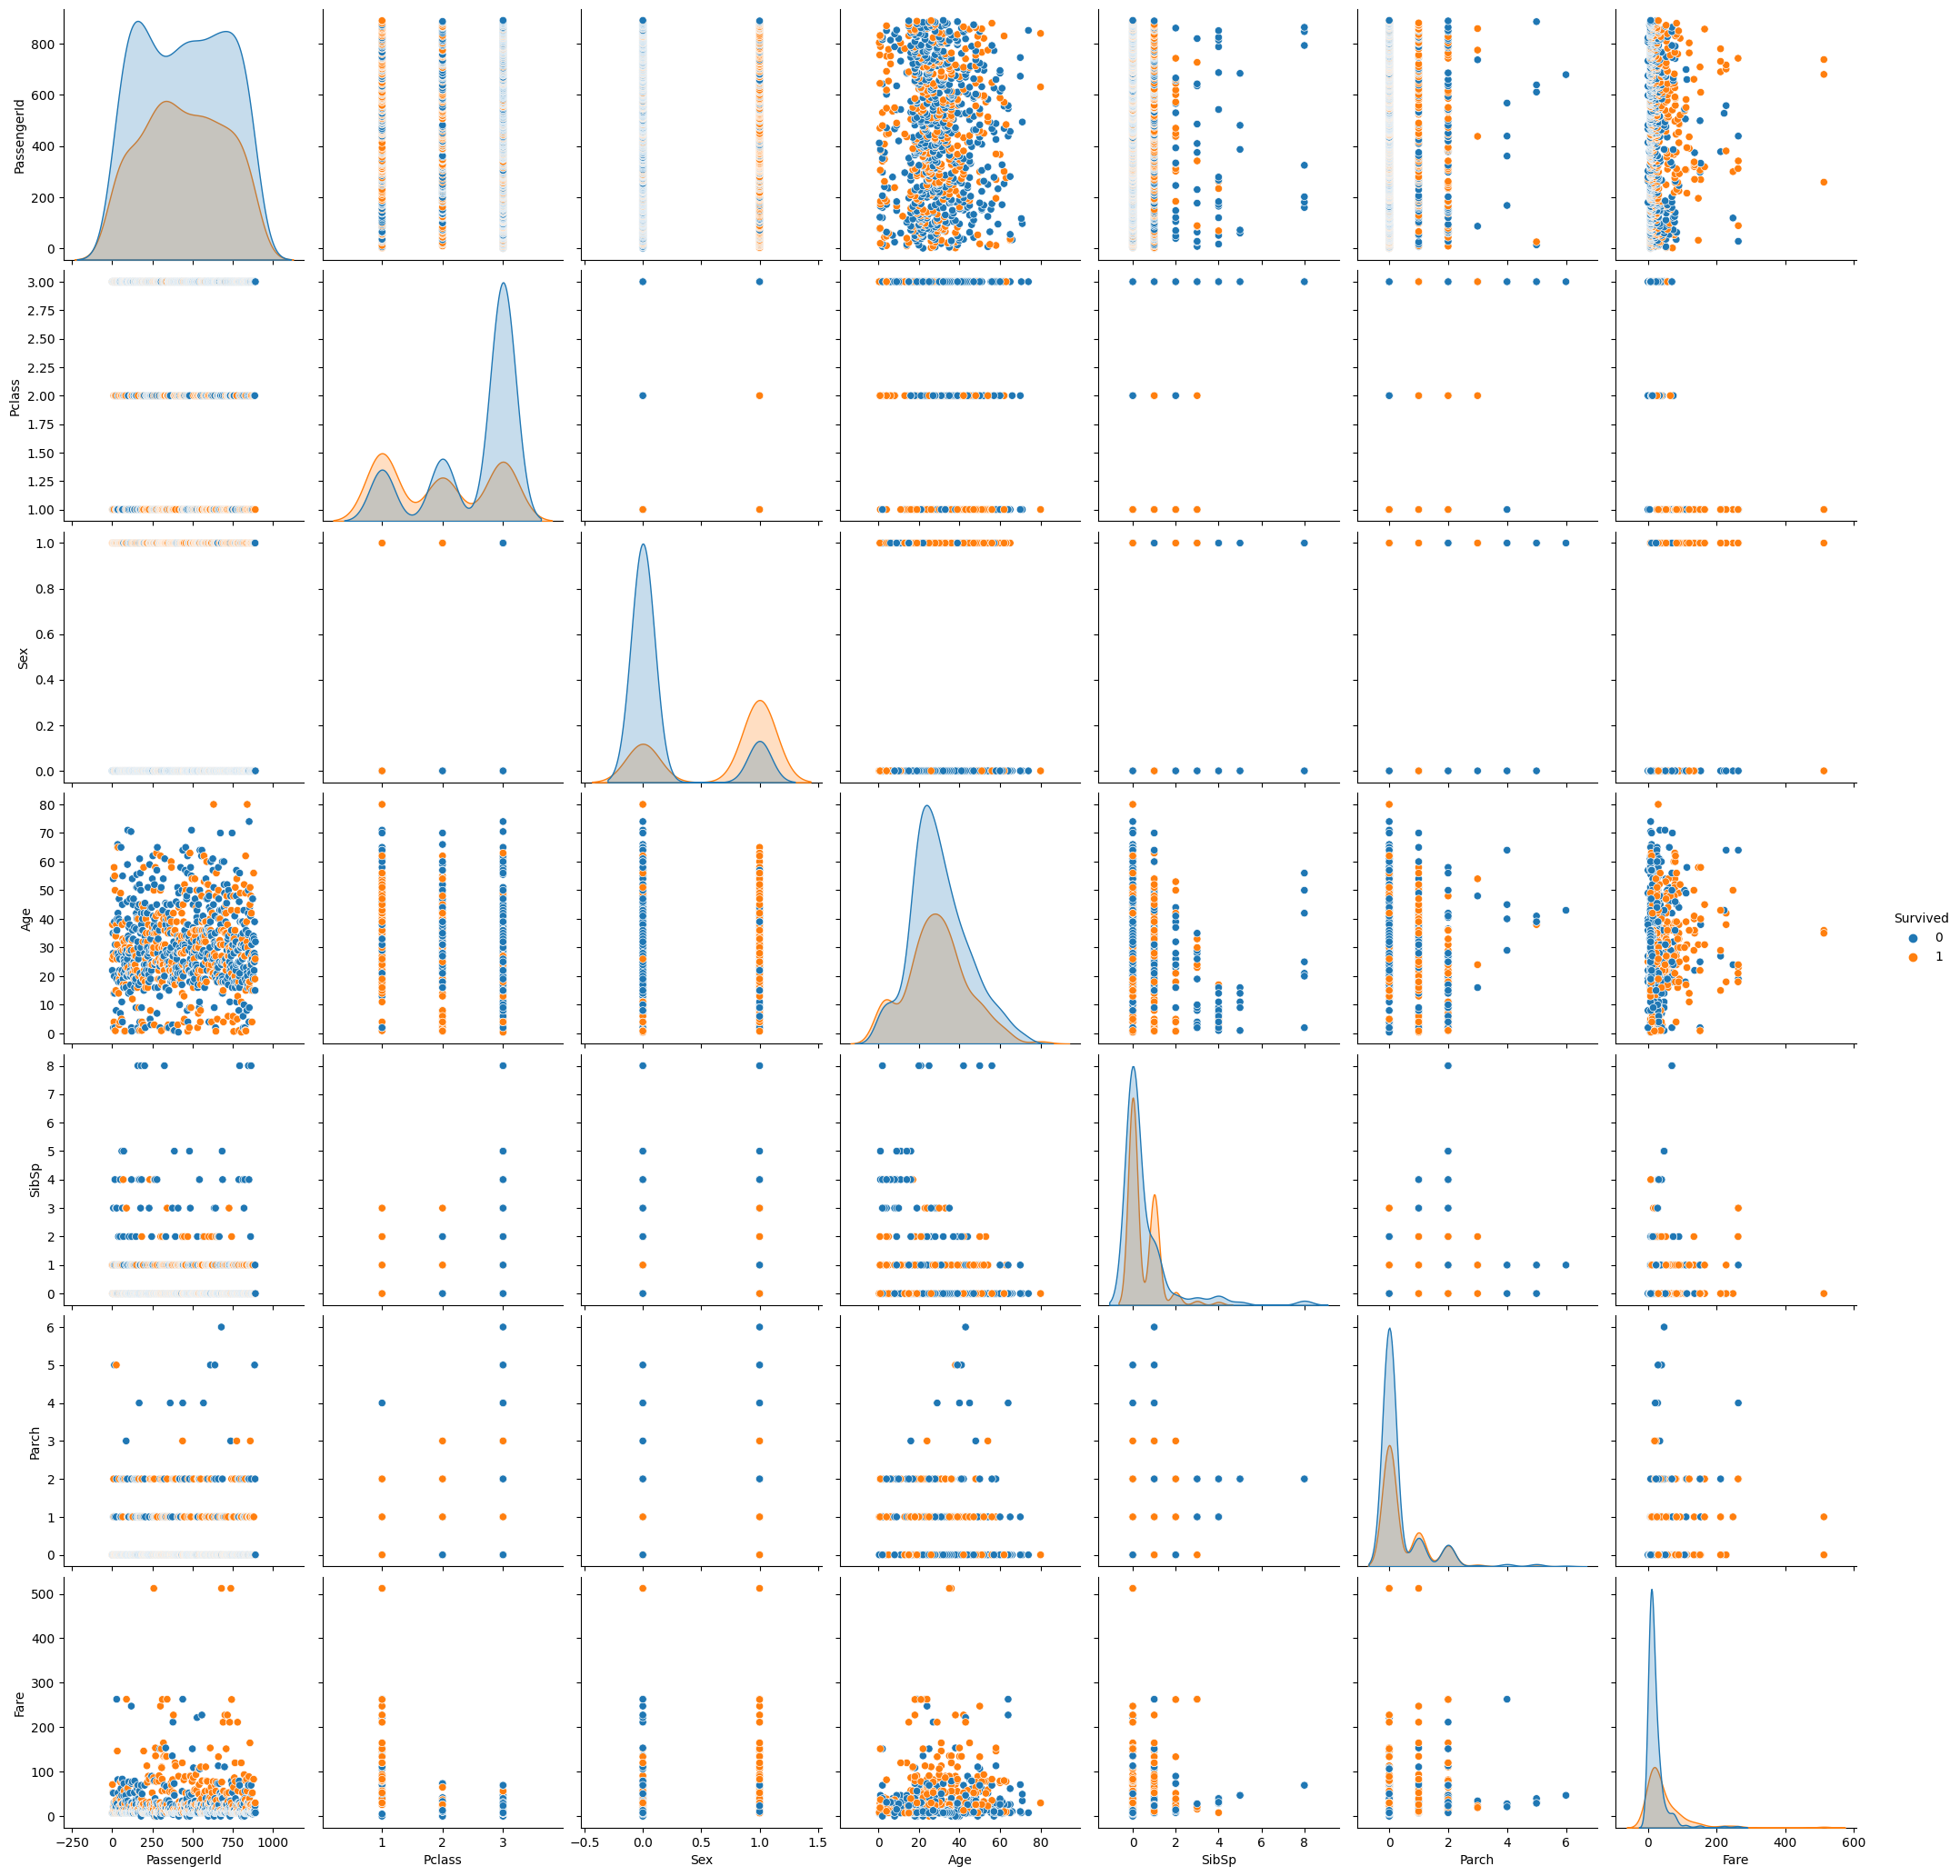

In [64]:
sns.pairplot(df, hue='Survived',height=3)

<Axes: >

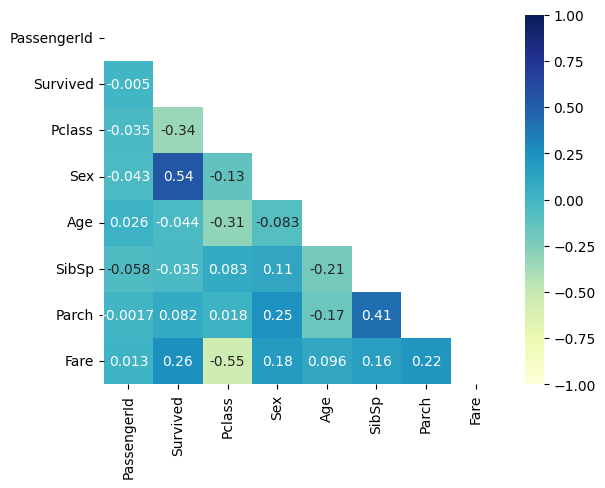

In [65]:
correlations = df.corr(numeric_only=True)
mask = np.triu(correlations)
sns.heatmap(correlations , vmax=1, vmin=-1, annot=True, mask=mask, cmap="YlGnBu")

## Baseline Model with Less Features

In [68]:
# Define features and target
X = df[['Pclass','Parch', 'SibSp']]
y = df['Survived']

In [69]:
#Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [70]:
# Define and fit model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#Make predictions

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

Accuracy on train set: 0.68
Accuracy on test set: 0.71


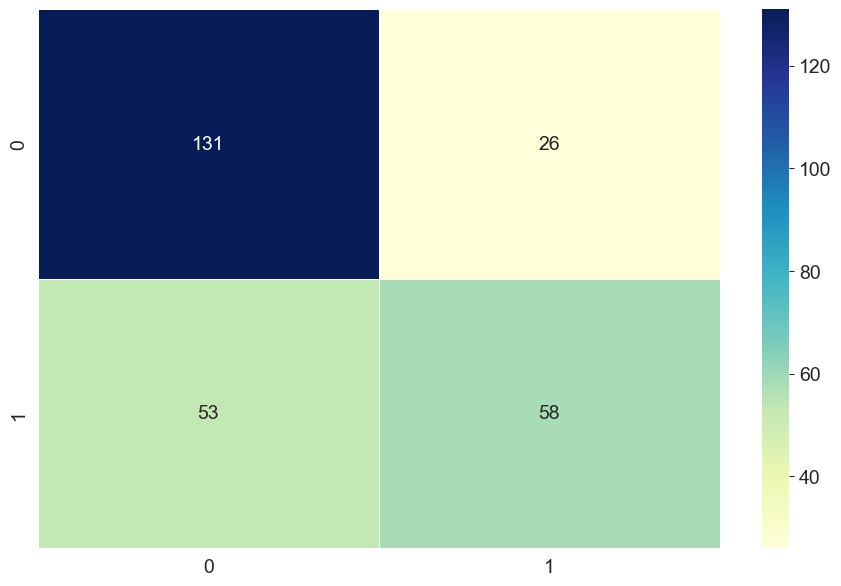

In [71]:
# Create confusion matrix and calculate accuracy
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)

print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred_test), 2))

## Model with More Feature

In [72]:
#Define features and target
X_2 = df[['Pclass','Parch', 'SibSp','Fare', 'Age','Sex']]
y_2 = df['Survived']

#Train-Test Split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=42, shuffle=True)

In [73]:
#Fit the model and make predictions

log_reg.fit(X_train_2, y_train_2)

y_pred_train_2 = log_reg.predict(X_train_2)
y_pred_test_2 = log_reg.predict(X_test_2)

Accuracy on train set: 0.79
Accuracy on test set: 0.799


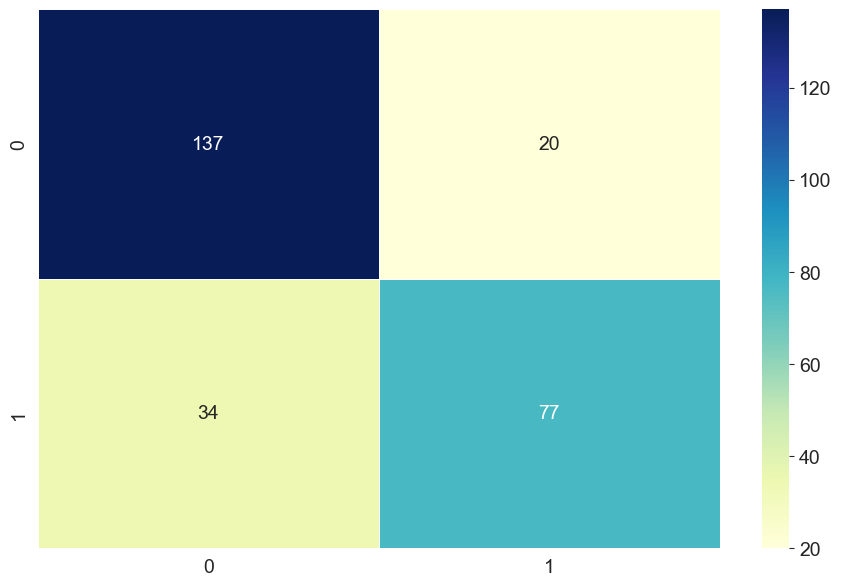

In [78]:
# Create confusion matrix and calculate accuracy

cm = confusion_matrix(y_test_2, y_pred_test_2)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

print("Accuracy on train set:", round(accuracy_score(y_train_2, y_pred_train_2), 3))
print("Accuracy on test set:", round(accuracy_score(y_test_2, y_pred_test_2), 3))

Seems like we already improve our baseline model with 10%. Lets add L2-regularization to see we can get any improvement.

In [76]:
log_reg_regu = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)

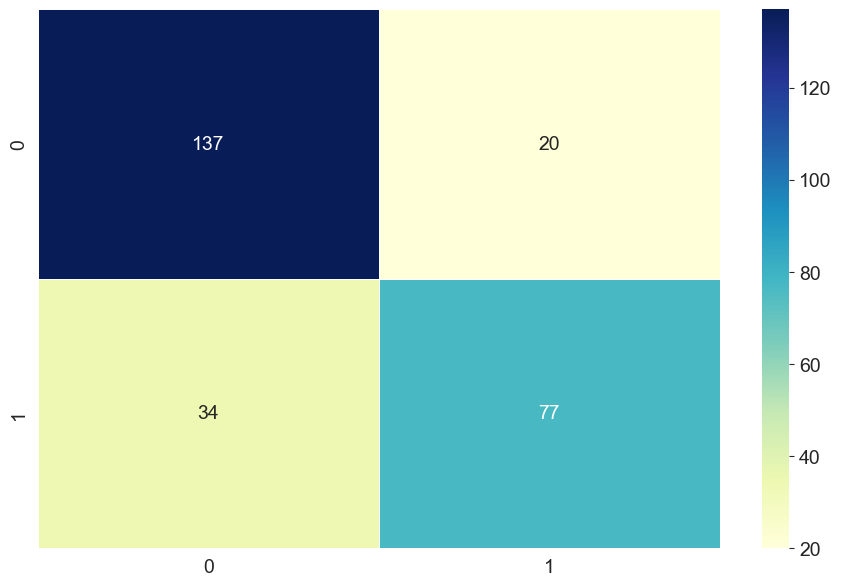

Accuracy on train set: 0.79
Accuracy on test set: 0.8


In [86]:
# Fit the model and make predictions
log_reg_regu.fit(X_train_2, y_train_2)

# Create confusion matrix and calculate accuracy
y_pred_train_2 = log_reg_regu.predict(X_train_2)
y_pred_test_2 = log_reg_regu.predict(X_test_2)

cm = confusion_matrix(y_test_2, y_pred_test_2)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.show()

print("Accuracy on train set:", round(accuracy_score(y_train_2, y_pred_train_2), 2))
print("Accuracy on test set:", round(accuracy_score(y_test_2, y_pred_test_2), 2))

Seems like model did not improved. Lets try Grid Search to see we can get any improvement. 

In [82]:
# Set up the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']}

In [83]:
log_reg_grid = LogisticRegression(max_iter=1000, random_state=42)

#Apply grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

#Fit the model
grid_search.fit(X_train_2, y_train_2)

/Users/burakbedir/Desktop/B/Project-Search-Docs/Titanic-Dataset-Logistic-Regression/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/burakbedir/Desktop/B/Project-Search-Docs/Titanic-Dataset-Logistic-Regression/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/burakbedir/Desktop/B/Project-Search-Docs/Titanic-Dataset-Logistic-Regression/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/burakbedir/Desktop/B/Project-Search-Docs/Titanic-Dataset-Logistic-Regression/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [84]:
# Print the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.7977290322580647


In [85]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred_test_2 = best_model.predict(X_test_2)
accuracy_test = accuracy_score(y_test_2, y_pred_test_2)
print("Accuracy on test set:", accuracy_test)

Accuracy on test set: 0.8059701492537313


Based on the results, it is evident that further enhancement of performance in logistic regression is not achievable with the provided dataset.